# Image Classification with Tensorflow

Reference: [Coursera Projects](https://www.coursera.org/learn/tensorflow-beginner-basic-image-classification/home/welcome)

<hr>

<strong>Objective</strong>: create and train a neural network model using keras.Tensorflow that predicts the class of an image (i.e. an image with the number 5 should output the number "5"). 

<hr>

### Step1: Dependencies

In [73]:
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.4.1


<hr>

### Step 2: Import the Data

In [74]:
# the MNIST dataset is commonly used for training image classification models
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [75]:
print(f"Shape of x: {x_train.shape}")
print(f"Shape of y: {y_train.shape}")
print("---" * 10)
print(f"Shape of x: {x_test.shape}")
print(f"Shape of y: {y_test.shape}")

Shape of x: (60000, 28, 28)
Shape of y: (60000,)
------------------------------
Shape of x: (10000, 28, 28)
Shape of y: (10000,)


<strong>Observed</strong>: There are 60,000 training samples and 10,000 testing samples. Each MNIST sample has 28 columns and 28 rows (each representing one pixel in an image)

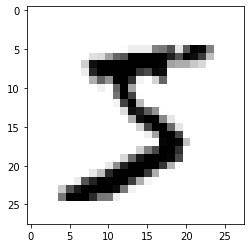

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

In [77]:
print(y_train[0])

5


In [78]:
# displaying the possible outputs of the samples
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


<hr>

### Step 3: One Hot Encoding

<strong>Defined</strong>: encoding each label by converting it to a list of 10 elements. For example, "1" will be [0,1,0,0,0,0,0,0,0,0], etc.

In [79]:
# One hot encode the y set
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [80]:
# observe the new shape of the the y set
print(f"new shape of y_train: {y_train_encoded.shape}")
print(f"new shape of y_test: {y_test_encoded.shape}")

new shape of y_train: (60000, 10)
new shape of y_test: (10000, 10)


<strong>Observed</strong>: The y sets are now 10 columns long, meaning each labels is encoded in a len = 10 array.

In [81]:
print(f"the new encoded label: {y_train_encoded[0]}")

the new encoded label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<hr>

### Neural Networks Visual

<img src="images/nn.png">

<strong>A representation of the linear equation in a neural network</strong>  
- Each x represents an input
- Each w represents a weight that acts as a multiplier for the input
- The b represents an intercept or bias
- The y represents the output created by the linear equation  

<strong>The vectorized model is the in vector form; each weight is then applied to each input "x".</strong>
- This is another way of visualizing the linear model, where the "." represents "applied to".

<hr>

### The objective is to find the optimal W and b to ensure that the input "x" leads to output "y"  
- In other words, we need to use an optimization method to solve classification problems

### Below is the explanation given in the lesson:

<img src="images/nnexplained.png">

<hr>

### Applying the Problem to a Neural Network model

- Remember that the shape of our dataset was 60000x28x28
    - In other words, we have 60,000 samples, each one consisting of 28 pixels by 28 pixels

<img src="images/nnapplied.png">

- In total we have 28 x 28 inputs, therefore there are 784 inputs/pixels per sample
- Each feature/input has a corresponding weight that it is multiplied to
- Each sample has a bias that is added to the linear equation
- Remember that the W and b is optimized using an optimizer.

<hr>

### A Deeper Dive into Neural Networks

<img src="images/nndetailed.png">

<strong>This is a Deep Learning Neural Network</strong>
- Similar to the linear equation, the "x" still represents an input that is fed alongside weights and a bias.
- The difference here is that the "+" summation circle also applies an Activation function
    - This Activation acts as a cascading catalyst, allowing the model to learn non-linear patterns
    - This gives the model more flexibility to getting the correct "y" output
- Each of these hidden layers acts as a "y" output of the previous layer.
    - In other words, each model is a combination of several "mini-models" repeatedly learning from previous inputs.
    - this increases the accuracy of the output "y"  
    
### Conclusion: "This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset"

<hr>

### Step 4: Data Preprocessing

In [82]:
import numpy as np

# We need to reshape the data into a 2dimensional numpy array. 28 x 28 = 784
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000,784))
print(f"Training set: {x_train_reshaped.shape}")
print(f"Testing set: {x_test_reshaped.shape}")

# Now the shape of both input sets are 2dimensional, with one total sample equaling 28x28 vector array

Training set: (60000, 784)
Testing set: (10000, 784)


In [83]:
# to make the model faster, we can normalize the data by calculating the mean and standard deviation of the dataset
# then use the mean and standard deviation to normalize each pixel value
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

# define the constant
epsilon = 1e-10

# formula to normalize the dataset
# std is usually a small value that can cause unstability in the normalization, so we subtract a constant (epsilon)
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

In [84]:
print(set(x_train_reshaped[0]))
print("---" * 10)
print(set(x_train_norm[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}
------------------------------
{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4

 We normalized the input values from whole numbers to formulated values using the formula above. This makes the input values normalized to where the model can compute faster and output more accurately than if used on the non-normalized inputs.

<hr>

### Step 5: Create the Neural Network Model

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# This is another way of creating model, different from other projects I've done before
# Usually I would use model.add to create the model
model = Sequential([
    # First Layer
    Dense(128, activation='relu', input_shape=(784,)),
    # Second Layer
    Dense(128, activation='relu'),
    # Third Layer
    Dense(10, activation='softmax') # softmax gives the probability scores of the nodes (10). These probabilities sum to 1.
])

- The model and relu function can be described as the below formulas

<img src='images/nnact.png'>

### Two steps to each node (128 then 128 then 10):

- The first step (linear function) is similar to the Neural Network Linear equation discussed before
    - The difference is the output, where the output is not "y", but rather "Z"
    - This means that for each input "X", a weight "W" is applied, then the product is added to bias "b"
    - This results in the weighted sum "Z" which is fed to the next part of the node
    
- The second step (activation function) applies the relu
    - relu is one of the most common activation functions
    - relu is a linear function for all positive values, and all negative values are set to 0

<img src='images/nodefunction.png'>

In [86]:
# Compile the model
model.compile(
    optimizer='sgd', # stochastic gradient descent
    loss='categorical_crossentropy', # difference between predicted output and actual outputs of the data
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Notes on compiling:
- SGD Optimizer: stands for stochastic gradient descent. Used to minimize the loss of the model
- categorical_crossentropy: the models predicted output - actual output. This needs to be minimized for a more accurate model.
- metrics=['accuracy']: this is what we want to measure

<hr>

### Step 6: Training the model

In [87]:
model.fit(x_train_norm, y_train_encoded, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 671us/step - loss: 0.6218 - accuracy: 0.8179
Epoch 2/10
1875/1875 [==============================] - 1s 662us/step - loss: 0.1931 - accuracy: 0.9432
Epoch 3/10
1875/1875 [==============================] - 1s 659us/step - loss: 0.1437 - accuracy: 0.9578
Epoch 4/10
1875/1875 [==============================] - 1s 663us/step - loss: 0.1158 - accuracy: 0.9648
Epoch 5/10
1875/1875 [==============================] - 1s 678us/step - loss: 0.0997 - accuracy: 0.9702
Epoch 6/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.0828 - accuracy: 0.97610s - loss: 0
Epoch 7/10
1875/1875 [==============================] - 1s 666us/step - loss: 0.0748 - accuracy: 0.9780
Epoch 8/10
1875/1875 [==============================] - 1s 666us/step - loss: 0.0648 - accuracy: 0.9814
Epoch 9/10
1875/1875 [==============================] - 1s 664us/step - loss: 0.0590 - accuracy: 0.9833
Epoch 10/10
1875/1875 [=============================

### Training usage:
- x_train_norm is used because it is the normalized inputs from the dataset
- y_train_encoded is used because it is a one hot encoded version of the output values

In [88]:
# To ensure the model was not using some sort of memorization, we need to evaluate it
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print(f"Test accuracy: {accuracy * 100}")

313/313 [==============================] - 0s 455us/step - loss: 0.0871 - accuracy: 0.9730
Test accuracy: 97.29999899864197


### Notes on Evaluating the model
- IF the test accuracy was somewhat close to the accuracy outputted from the model iteration (10 epochs):
    - we can conclude that the model did NOT memorize the dataset, and that the training is successful
- IF the test accuracy was significantly lower/higher or far from the accuracy of the model iteration (10 epochs):
    - we can conclude that the model memorized the dataset

<hr>

### Step 7: Predictions and Plotting

In [89]:
predictions = model.predict(x_test_norm)
print(f"Shape of the predictions: {predictions.shape}")

Shape of the predictions: (10000, 10)


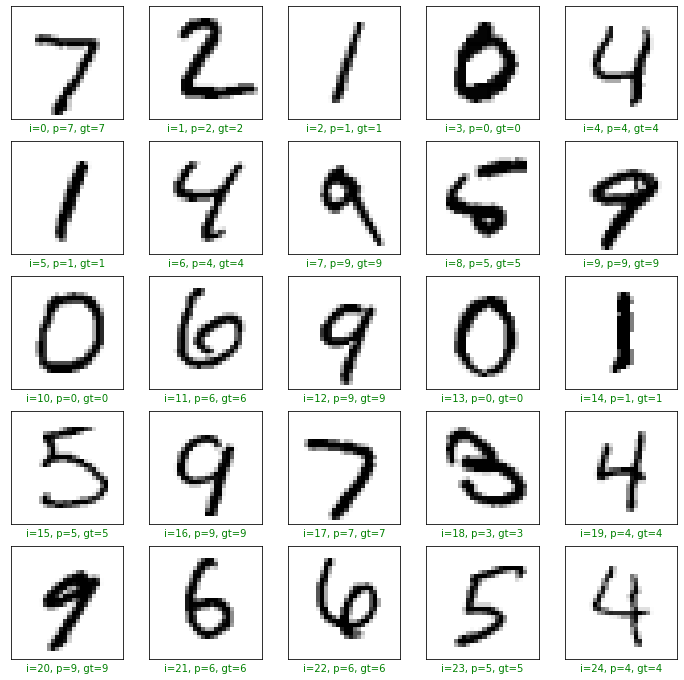

In [90]:
# set the entire figure size to a 12x12 figure
plt.figure(figsize=(12,12))

# Optional: set a current index, easier for for loop iteration
begin_at = 0

# for loop to plot each prediction ofr the model
for i in range(25):
    
    # set the size of each plot prediction
    plt.subplot(5,5,i+1)
    
    # remove the grid, x ticks, and y ticks
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # each prediction should be set to a numpy array using the list of predictions
    prediction = np.argmax(predictions[begin_at+i])
    
    # set a variable for the actual output value (what it is supposed to be) to compare to the predicted value
    ground_truth = y_test[begin_at+i]
    
    # set the color output to green if the prediction matches the actual value. If not, color it red.
    col='g'
    if prediction != ground_truth:
        col='r'
    
    # what should be displayed? the index of whatever image we're predicting, the predicted value, and actual value.
    plt.xlabel("i={}, p={}, gt={}".format(begin_at+i, prediction, ground_truth), color=col)
    plt.imshow(x_test[begin_at+i], cmap='binary')

plt.show()

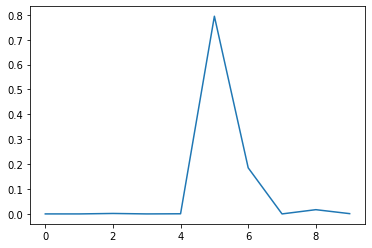

In [91]:
plt.plot(predictions[8])
plt.show()

### The model predicted images 1-25 correctly. Accuracy set at around 98%